#Aula 3 - Visualização Básica de Dados


Todo material da aula de hoje é uma releitura da documentação e da galeria da biblioteca ``seaborn`` (https://seaborn.pydata.org/tutorial.html)

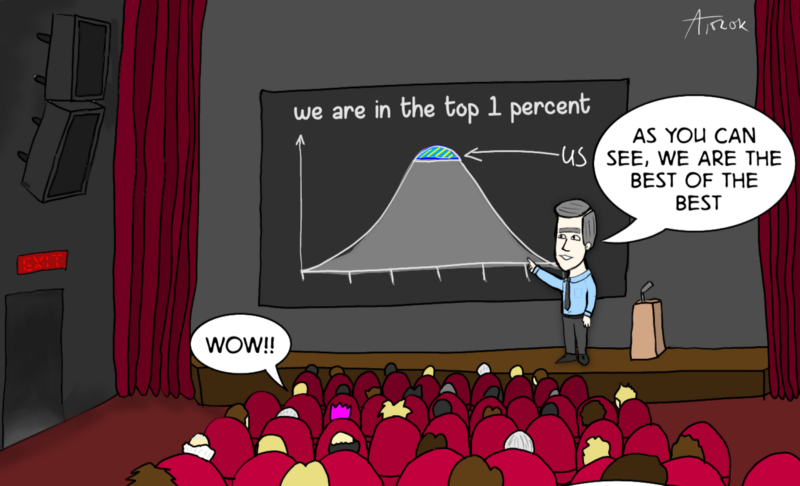

Fonte da figura: https://towardsdatascience.com/so-you-want-to-become-a-data-scientist-c47e196b5ab5

# Preliminares

## Motivação

Há vários (bons) motivos para saber gerar visualizações informativas:
1. representação e sumarização de um fenômeno
2. análise exploratória para entender propriedades dos conjuntos de dados
3. teste de sanidade (os dados são consistentes?)
4. impressionar o/a chefe ou os/as clientes
5. Para o pessoal da pós: **uma figura feia, errada ou mal feita** gera a impressão de desleixo com o trabalho. Isso aumenta significativamente a chance de rejeição
  * Não é um absurdo gastar um dia para preparar uma figura para um artigo científico
6. A verdade é que **uma imagem fala mais que mil palavras!**

## Qual tipo de gráfico utilizar?

Vai depender de vários fatores:
* O que você quer mostrar, i.e., do objetivo
* Sua criatividade
* Do tipo de variável (ou dados). Na maior parte dos casos, dados podem ser:
  * Categóricos (e.g., tipo sanguíneo)
  * Numéricos e discretos (e.g., idade)
  * Numéricos e contínuos (e.g., altura)
  * Mas também podemos ter *grafos*, *sequências*, ...

## Qual biblioteca utilizar?

* raiz: ``matplotlib`` (https://matplotlib.org/)
* *fancy*: ``seaborn`` (https://seaborn.pydata.org/)
* *fancy* e interativa: ``plotly`` (https://plotly.com/python/)

Hoje veremos algumas situações e como abordá-las (graficamente) usando ``seaborn``:
* Focaremos em visualizações básicas para análise exploratória
* Ao longo do semestre, veremos visualizações para outras situações específicas (agrupamento, classificação, ...)


# Exemplos utilizando ``Seaborn``

## Relação entre *variáveis*

Frequentemente, estamos interessados em saber se duas variáveis possuem algum tipo de relação.

Para decidir se há (ou não) uma relação:
* devemos usar um teste estatístico
* mas, podemos utilizar análise gráfica para estabelecer hipóteses e ganhar familiaridade com os dados

Vamos utilizar alguns conjuntos de dados (da própria biblioteca) como exemplo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


#### A *gratificação* depende do *valor da conta*?

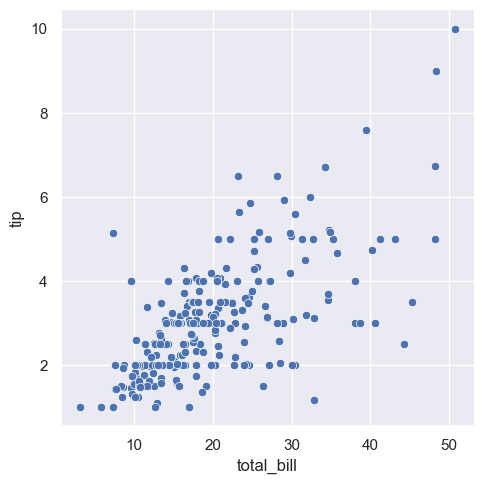

In [4]:
sns.relplot(x = "total_bill", y = "tip", data = tips);

### A relação existente depende do fato da pessoa ser *fumante*?

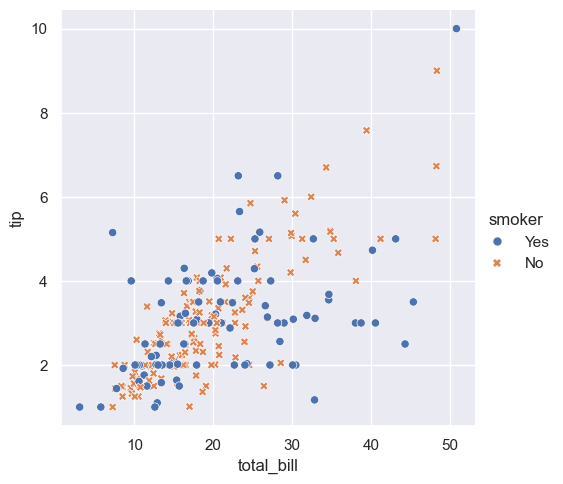

In [5]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips);

### A relação existente depende do fato da pessoa ser *fumante* **e** do horário da refeição?

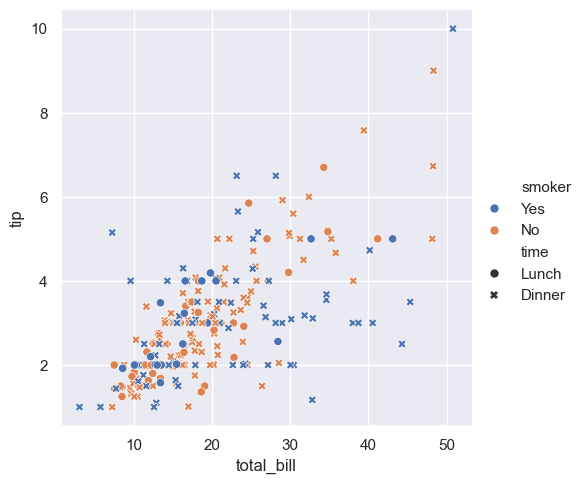

In [6]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

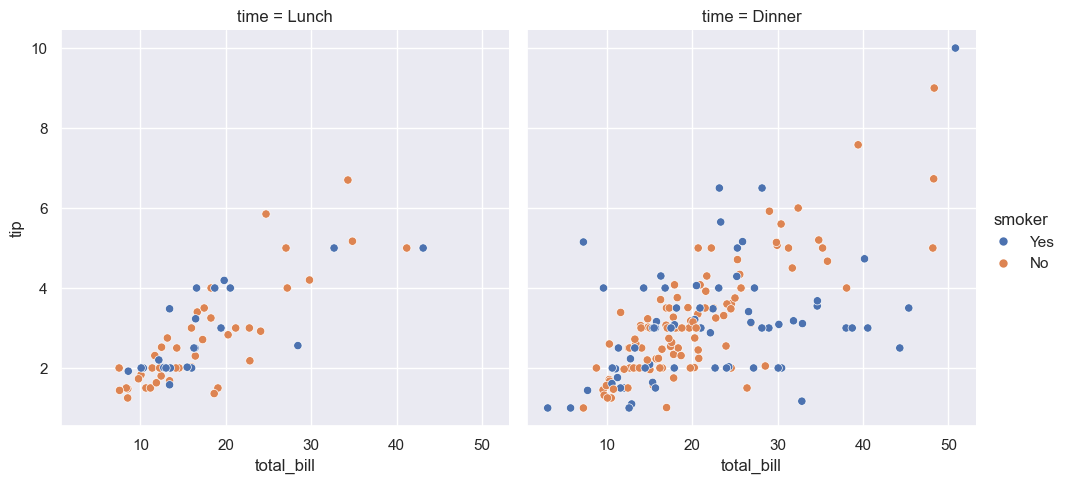

In [7]:
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

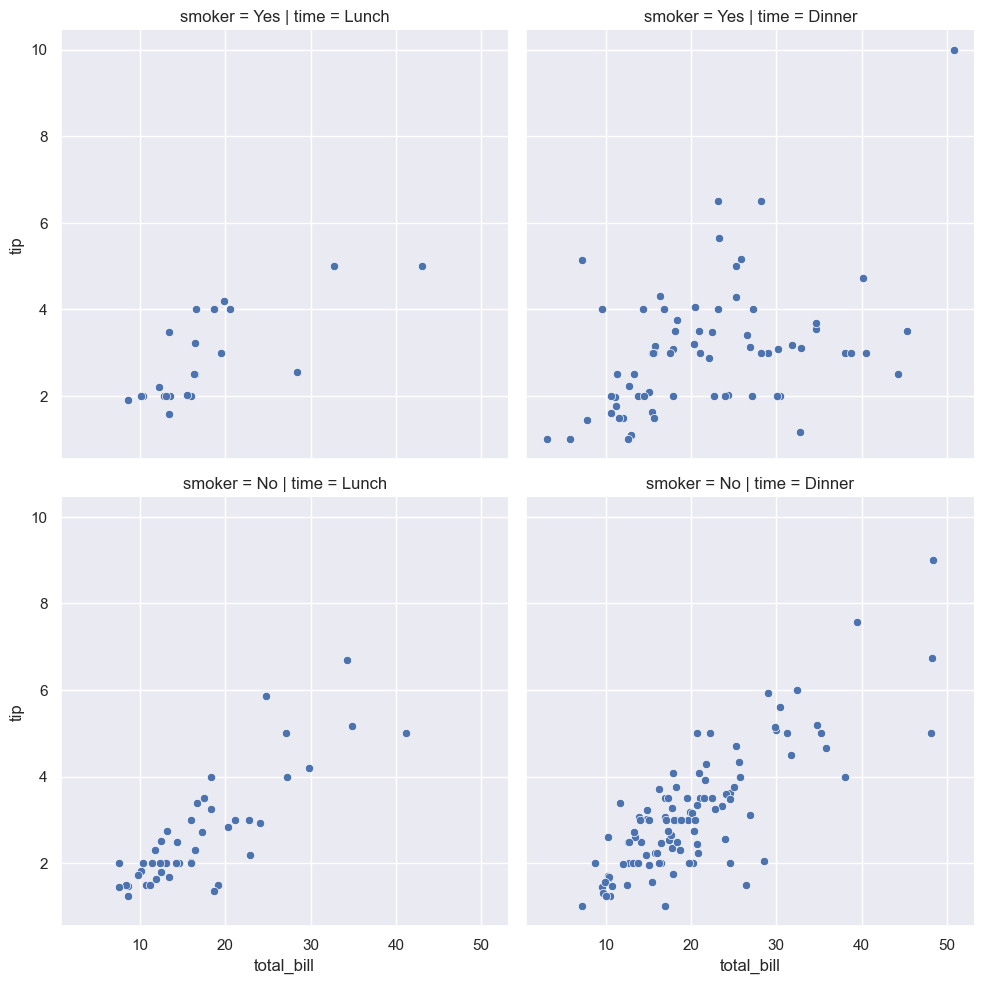

In [8]:
sns.relplot(x="total_bill", y="tip", row="smoker", col="time", data=tips);

### A relação existente depende do número de pessoas na mesa (i.e., pressão social)?

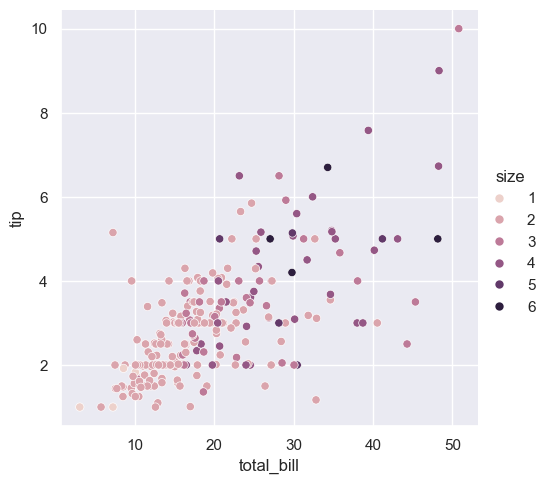

In [9]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

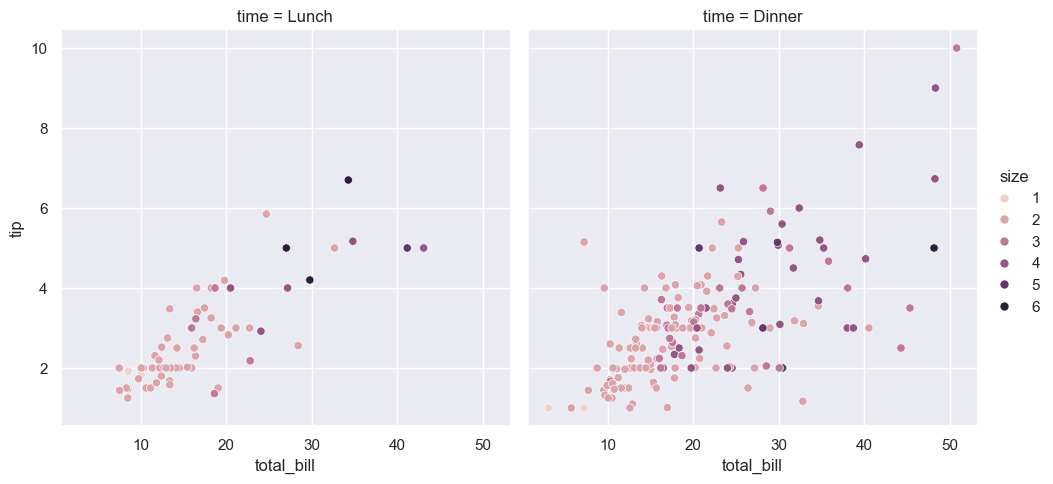

In [10]:
sns.relplot(x="total_bill", y="tip", hue="size", col="time", data=tips);

## Visualizando distribuições empíricas

Deve ser o **Passo 0** de toda análise de dados.

A distribuição (de probabilidade) empírica mostra quais os valores (ou intervalos) são mais prováveis.

In [11]:
penguins = sns.load_dataset("penguins")

In [12]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [13]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Histograma de Frequência

Conta o número de instâncias em intervalos de tamanho fixo.

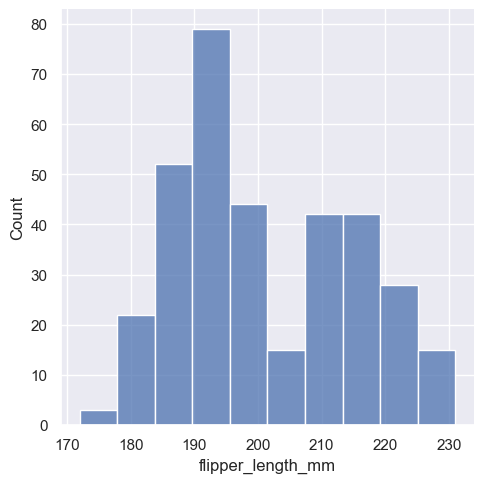

In [14]:
sns.displot(penguins, x="flipper_length_mm");

É possível configurar o *comprimento* dos intervalos ou o *número* de intervalos.

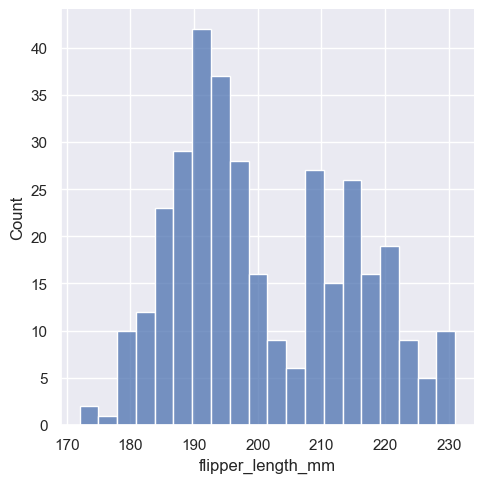

In [15]:
sns.displot(penguins, x="flipper_length_mm", binwidth=3);
#sns.displot(penguins, x="flipper_length_mm", bins=25);

#### O *comprimento da nadadeira* depende da *espécie*?

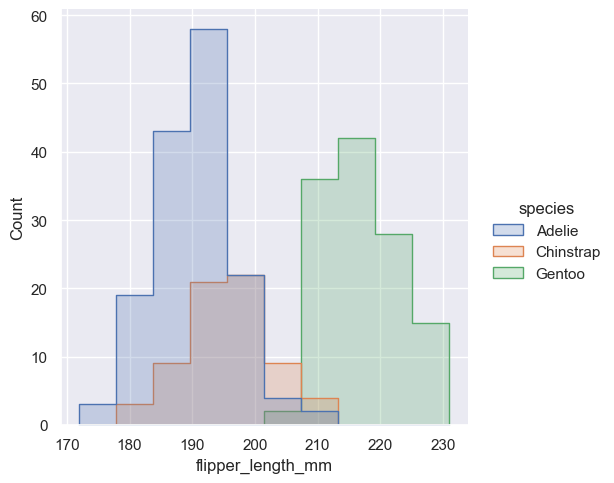

In [16]:
#sns.displot(penguins, x="flipper_length_mm", hue="species");
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step");

#### O *comprimento da nadadeira* depende do *sexo*?

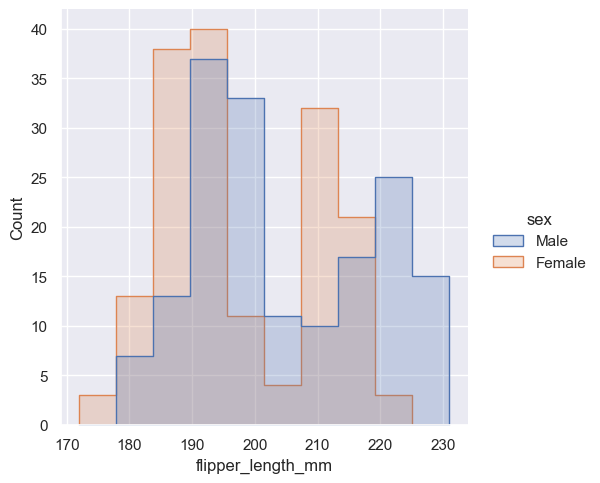

In [17]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", element = "step");

#### O *comprimento da nadadeira* depende da *espécie* **e** do *sexo*?

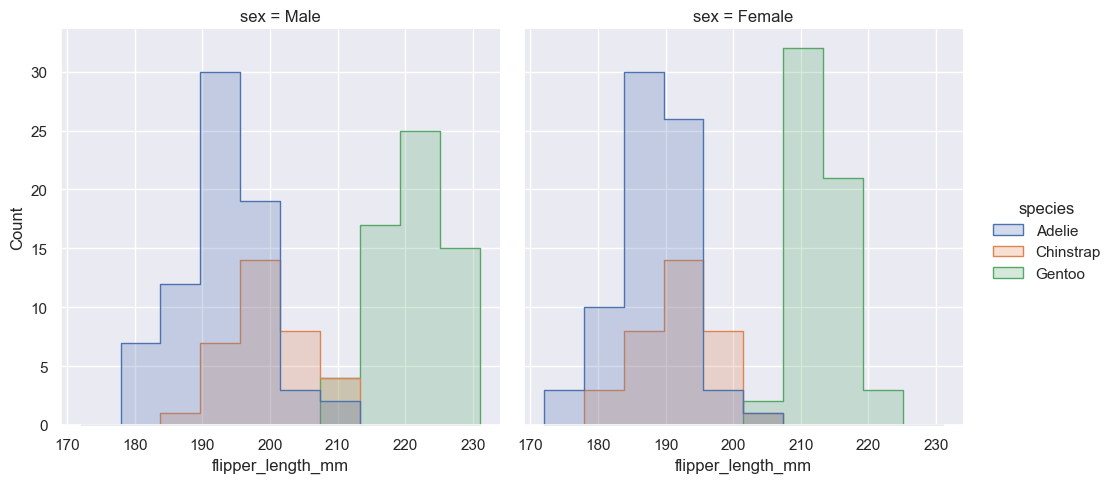

In [18]:
sns.displot(penguins, x="flipper_length_mm", hue="species", col = 'sex', element = "step");
#sns.displot(penguins, x="flipper_length_mm", hue="sex", col = 'species', element = "step");

### Histograma de densidade (variáveis contínuas)

É comum, quando trabalhamos com variáveis contínuas, apresentar o histograma de forma que a área do gráfico seja 1.

Por que isso é interessante?
Lembrem, toda variável aleatória contínua possui uma **função de densidade**. Essa função:
* Assume apenas valores positivos
* Integra 1 (de $-\infty$ a $\infty$)
* Integra, de $a$ a $b$, a probabilidade de um valor no intervalo $[a, b]$.

Observações:
1. As propriedades acima "valem" também para um histograma de densidade
2. A "forma" desse histograma é a mesma do histograma de frequência. Mudam apenas os valores no eixo $y$.

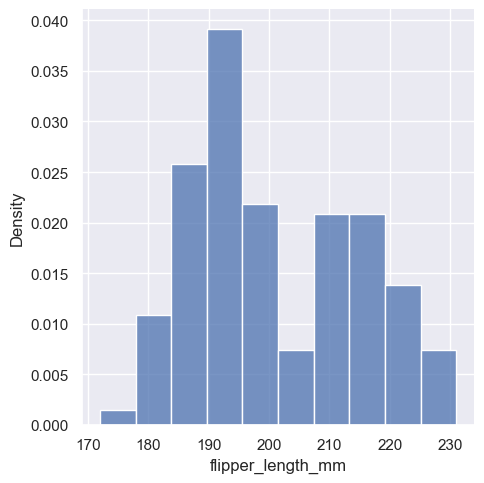

In [19]:
sns.displot(penguins, x="flipper_length_mm", stat="density");

Como no histograma de frequências, é possível condicionar a análise por outras variáveis.

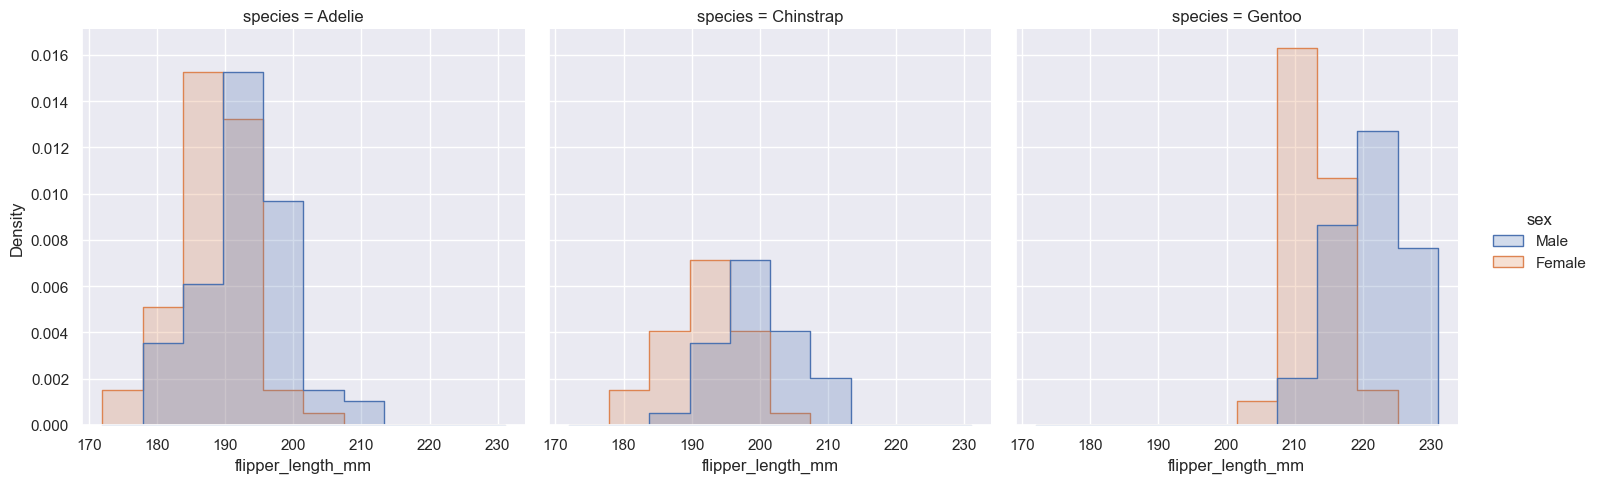

In [20]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", col = 'species', element = "step", stat = "density");
#sns.displot(penguins, x="flipper_length_mm", hue="sex", col = 'species', element = "step");

Veja que nos histogramas acima, as áreas dos histogramas são diferentes. De fato, a área de cada um deles não é 1.

Isso é feito para que, por padrão, os histogramas de densidade tenham as mesmas formas que os histogramas de frequência.

É possível fazer com que cada histograma, individualmente, integre 1. Para isso, precisamos adicionar o parâmetro ``common_norm = False``.

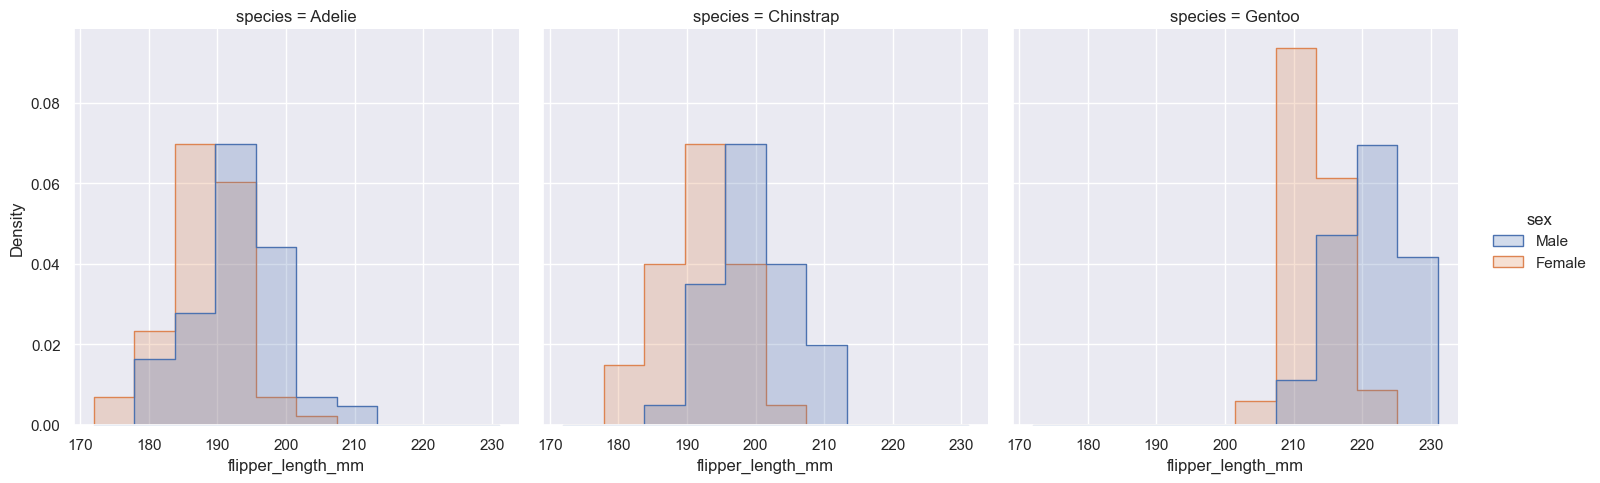

In [21]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", col = 'species', element = "step", stat = "density", common_norm=False);

### Histograma de probabilidade (variáveis discretas)

Quando trabalhamos com variáveis discretas, estamos mais interessados em probabilidades (frações) do que em densidades.

``seaborn`` nos permite modificar o eixo $y$ para refletir essa necessidade. Nesse caso, as alturas das barras somam 1.

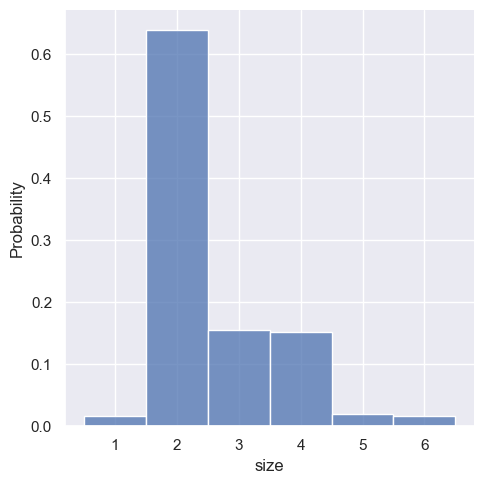

In [22]:
sns.displot(tips, x="size", stat="probability", discrete = True);

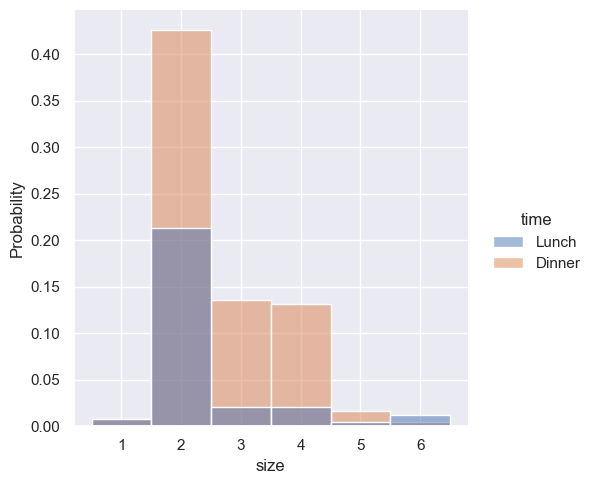

In [23]:
sns.displot(tips, x="size", stat="probability", hue = 'time', discrete = True);
#sns.displot(tips, x="size", stat="probability", hue = 'time', discrete = True, common_norm = False);

### KDE (*Kernel Density Estimation*)


É uma forma suavizada dos histogramas de densidade que vimos acima.

Como nos casos anteriores, a densidade deve integrar 1.

Vantagens em relação a um histograma tradicional:
* Não é necessário se preocupar com o número de *bins* ou comprimento dos *bins*
* Mais fácil de analisar e identificar pontos importantes
  * deslocamentos laterais
  * modas

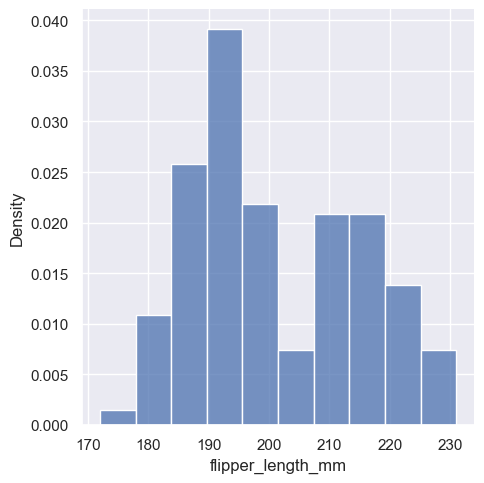

In [24]:
sns.displot(penguins, x="flipper_length_mm", stat = 'density');

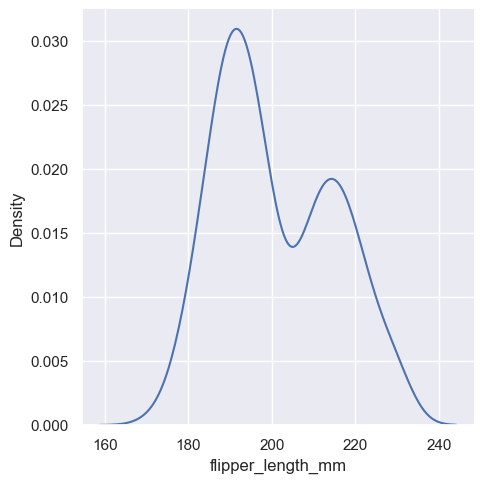

In [25]:
sns.displot(penguins, x="flipper_length_mm", kind="kde");

Valem as mesmas variações e observações para os histogramas acima.

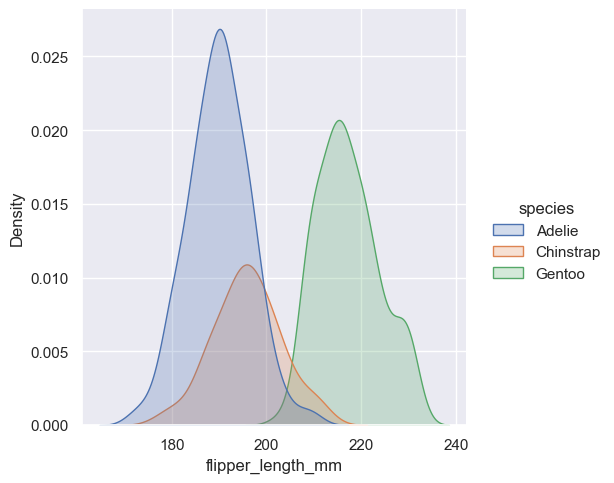

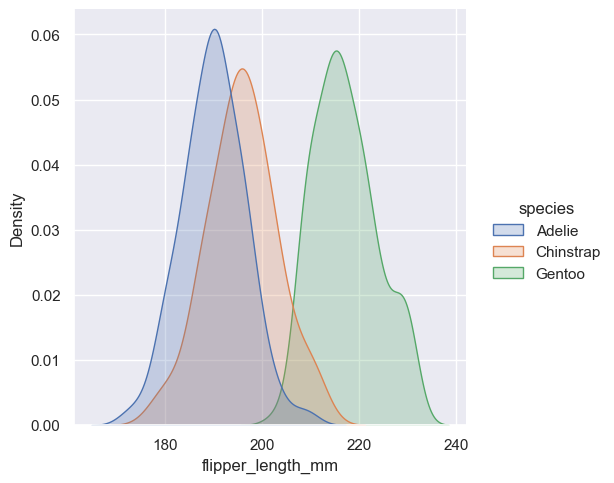

In [26]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True);
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True, common_norm = False);

#### Desvantagens dos KDEs

Apesar das vantagens em relação aos histogramas, KDEs não são livres de defeitos.

Ao invés de nos preocuparmos com o número (ou comprimento) de *bins*, temos que nos preocupar com o fator de suavização.

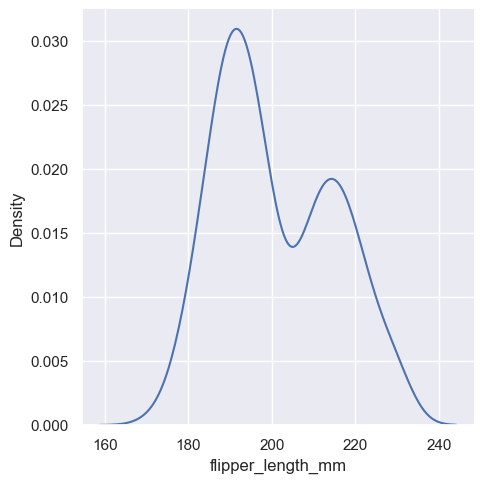

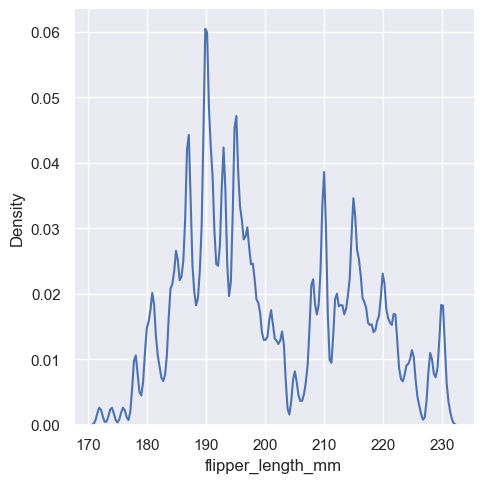

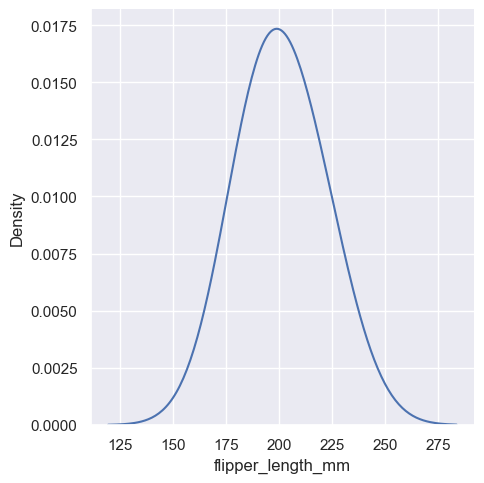

In [27]:
sns.displot(penguins, x="flipper_length_mm", kind="kde");
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust = 0.1);
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust = 4);

Se não tomarmos os devidos cuidados, um histograma suavizado pode gerar probabilidade positiva para valores impossíveis.

Veja, no caso abaixo, que o histograma aponta a existência de *gratificações* negativas.

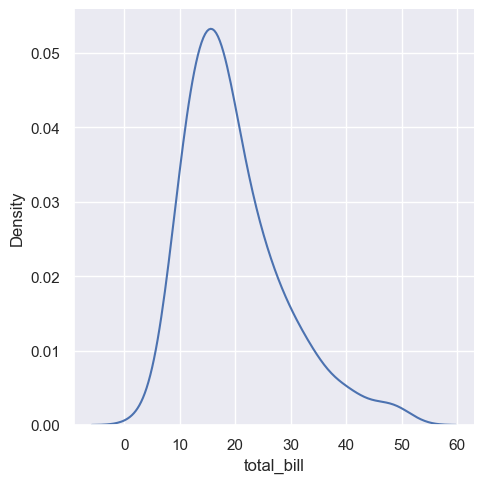

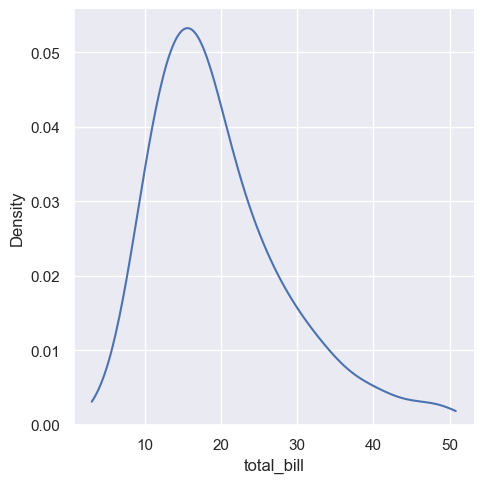

In [28]:
sns.displot(tips, x="total_bill", kind="kde");
sns.displot(tips, x="total_bill", kind="kde", cut=0);

### ECDF (*Empirical Cumulative Distribution Function*)

Há uma forma de visualizar distribuições sem se preocupar com as desvantagens dos *histogramas* e dos *histogramas suavizados*.

Para isso, vamos utilizar a *Função de Distribuição Empírica* dos dados.

Antes de ver como isso funciona, se liga aí que é hora da revisão...

Seja $X$ uma variável aleatória. A **Função de Distribuição** de $X$ é definida por:
$$F_X(x) = P(X \le x),$$
para $-\infty < x < \infty$.

Alguns autores se referem à **Função de Distribuição** como **Função de Distribuição Acumulada**, daí o termo em inglês, CDF (*Cumulative Distribution Function*).

**Fato interessante:** a função de distribuição é a "entidade" com a maior quantidade de informação sobre uma variável aleatória. A partir de $F_X(x)$, pode-se derivar qualquer característica de $X$.

Esse fato faz com que a ECDF (*Empirical Cumulative Distribution Function*), ou simplesmente CDF, seja uma ferramenta poderosa para descrever variáveis de um conjunto de dados.

Em resumo:
* O eixo $x$ terá os valores que nossa variável assume
* O eixo $y$ indicará a fração de valores que são **menores ou iguais** a $x$.

In [29]:
tips['percentage'] = 100 * tips.tip / tips.total_bill
tips.head()


,total_bill,tip,sex,smoker,day,time,size,percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


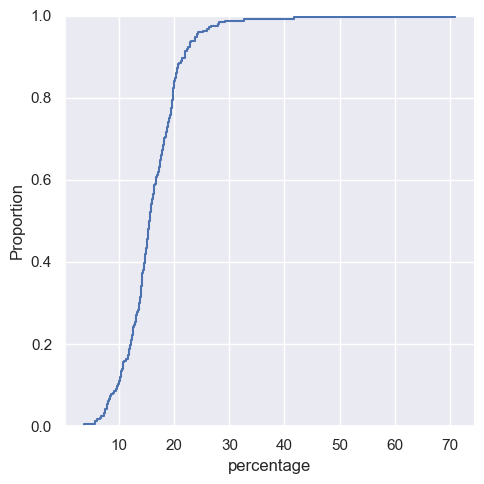

In [30]:
sns.displot(tips, x = "percentage", kind="ecdf");

Alguns pontos interessantes sobre o gráfico acima:
* Aproximadamente 80% dos consumidores dão uma gratificação menor ou igual a 20% da conta
* Aproximadamente 50% dos consumidores dão uma gratificação menor ou igual a 15% da conta
* Aproximadamente 15% dos consumidores dão uma gratificação menor ou igual a 10% da conta

Assim como nos gráficos anteriores, podemos colocar mais de uma variável (linha) na mesma figura.

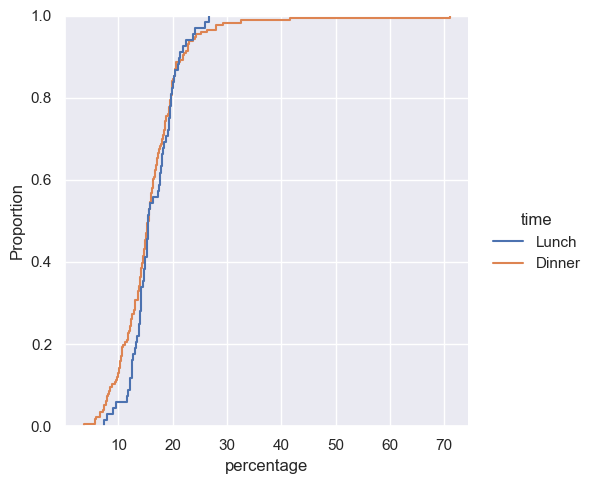

In [31]:
sns.displot(tips, x="percentage", hue="time", kind="ecdf");

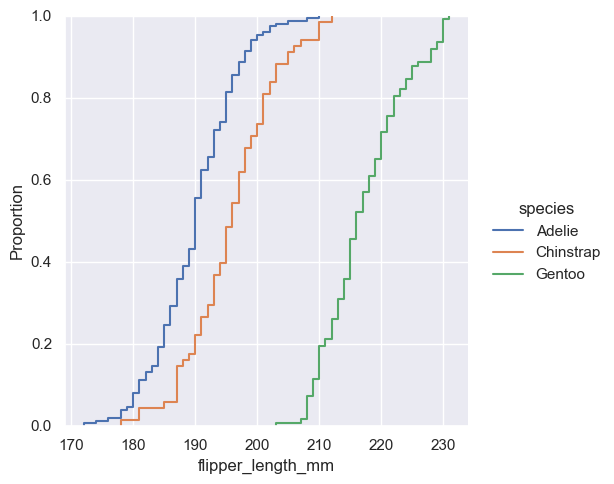

In [32]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="ecdf");

### Distribuições Bivariadas

Uma outra forma de entender a relação entre duas variáveis é pela inspeção da distribuição conjunta entre elas.

Para este estudo, em geral, observamos um mapa de calor ou alguma outra representação visual de uma matriz.

O gráfico abaixo mostra como o *comprimento do bico* e a *profundidade do bico* se distribuem conjuntamente no plano.

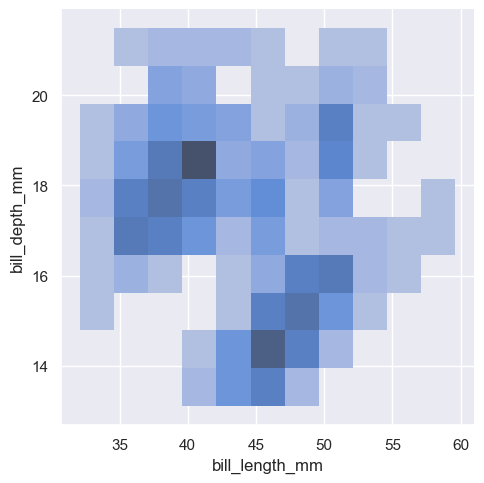

In [33]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm");

O gráfico abaixo mostra como o *comprimento do bico* e a *profundidade do bico* se distribuem conjuntamente no plano, considerando cada espécie.

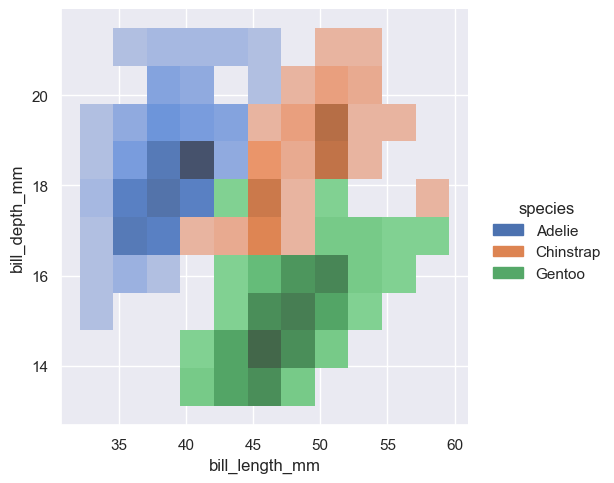

In [34]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species");

O gráfico abaixo também mostra como o *comprimento do bico* e a *profundidade do bico* se distribuem conjuntamente no plano, considerando cada espécie.

Essa versão é uma suavização dos gráficos acima (usando KDE).

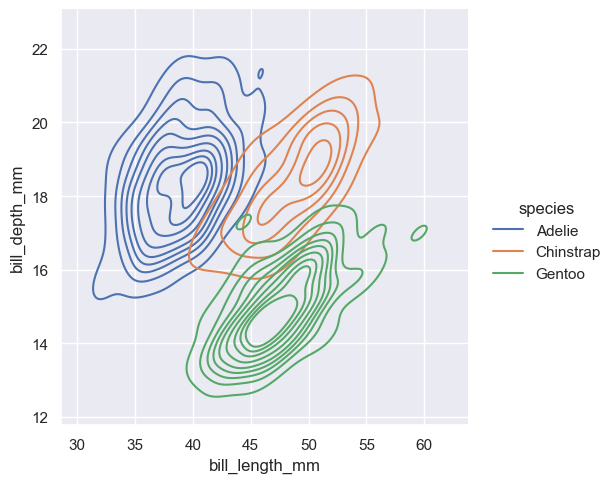

In [35]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde");

Por fim, essa última versão adiciona as distribuições marginais de cada variável.

Veja a quantidade de informação que é gerada com apenas um comando.

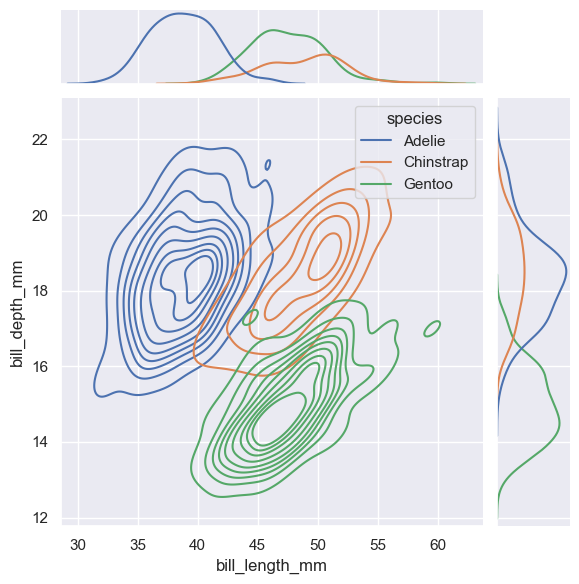

In [36]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
);

##Dados categóricos

Dados (ou variáveis) *categóricos* são aqueles que indicam uma categoria dos itens de interesse.

Geralmente, assumem valores não numéricos e pertencentes a um conjunto de tamanho pequeno.

Variáveis categóricas podem ter informação **ordinal** (e.g., uma camiseta pode ser P, M, G ou GG) ou **não ordinal** (e.g., tipo sanguíneo pode ser A, B, AB ou O).

Como vimos nos exemplos anteriores, variáveis categóricas podem ser úteis no processo de análise/caracterização. Veremos mais alguns exemplos a seguir, considerando um novo conjunto de dados da biblioteca ``seaborn``.

In [37]:
titanic = sns.load_dataset("titanic");
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [38]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Sumarização por categoria

#### Entre homens e mulheres, qual maior percentual de sobreviventes?

/tmp/ipykernel_8338/1692656423.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x="sex", y="survived", kind="bar", data=titanic, ci = None);


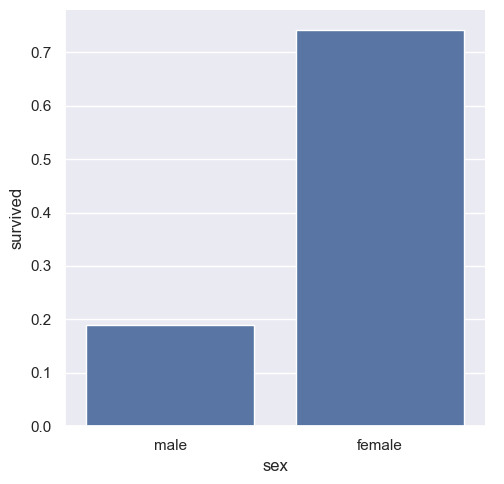

In [39]:
sns.catplot(x="sex", y="survived", kind="bar", data=titanic, ci = None);

#### Entre as classes (primeira, segunda e terceira), qual maior percentual de sobreviventes?

/tmp/ipykernel_8338/3583629785.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x="class", y="survived", kind="bar", data=titanic, ci = None);


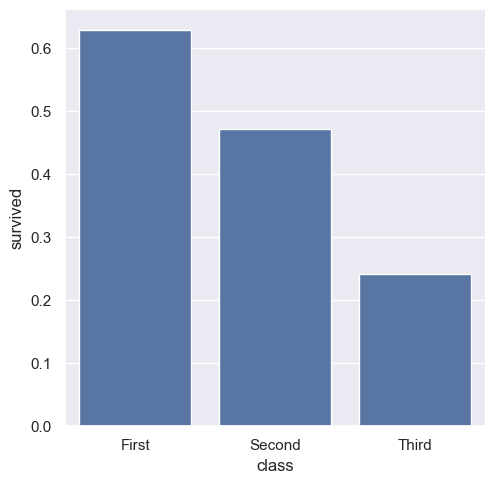

In [40]:
sns.catplot(x="class", y="survived", kind="bar", data=titanic, ci = None);

#### E combinando as duas variáveis?

/tmp/ipykernel_8338/3464335476.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic, ci = None);


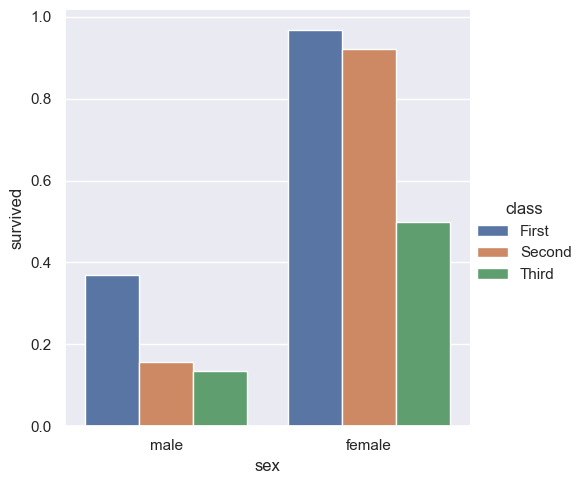

In [41]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic, ci = None);

### Distribuição por categoria

Além dos **histogramas**, **KDEs** e **CDFs**, podemos ganhar conhecimento sobre a distribuição de variáveis utilizando **boxplots** e **violinplots**.

Qual gráfico escolher? Isso vai depender muito da **audiência**, sua **criatividade** e **preferência**.

#### Box Plot

Apresenta uma sumarização da distribuição dos dados. Como interpretar?

1. A caixa delimita:
  * $Q1$: percentil 25%
  * $Q2$: percentil 50%, i.e., mediana
  * $Q3$: percentil 75%
2. As linhas horizontais indicam os maiores/menores valores que não são *outliers* (discrepantes)
3. *Pontos* acima/abaixo do gráfico indicam *outliers*
4. Um valor é um *outlier* **pequeno** se for **menor** que $Q1 - 1.5(Q3-Q1)$
5. Um valor é um *outlier* **grande** se for **maior** que $Q3 + 1.5(Q3-Q1)$

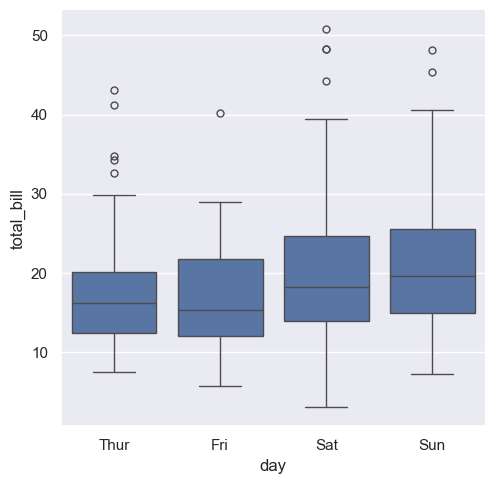

In [42]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

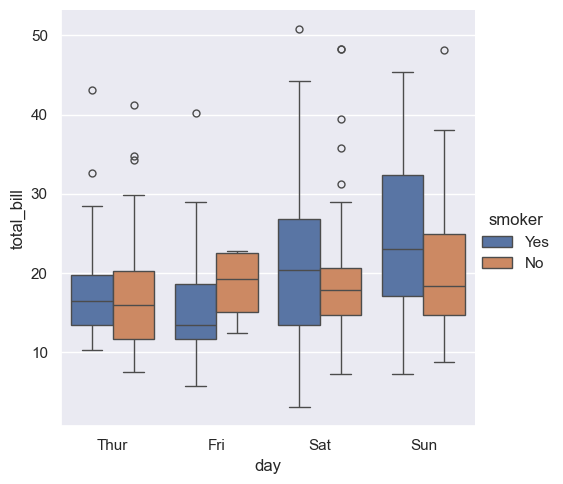

In [43]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

#### Violin Plot

A ideia desse gráfico é combinar o poder de sumarização dos *box plots* com a propriedade de suavização dos KDEs.

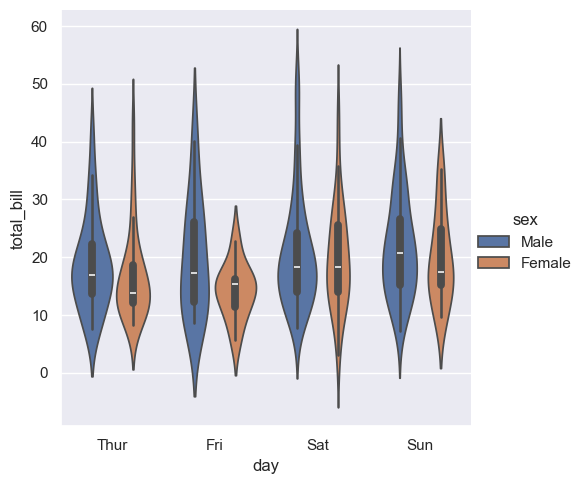

In [44]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", data=tips);

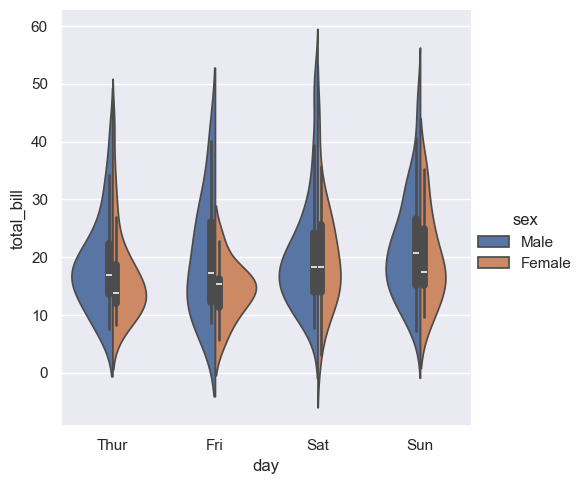

In [45]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);

## Mapa de Calor

Em nossa primeira aula, vimos o poder descritivo de um mapa de calor bem feito.

Mapas de calor (*heat maps*) podem ser feitos com ``matplotlib``, mas ``seaborn`` deixa a visualização ainda mais relevante.

In [46]:
flights_long = sns.load_dataset("flights")
flights_long.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [47]:
flights = flights_long.pivot(index = "month", columns = "year", values = "passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


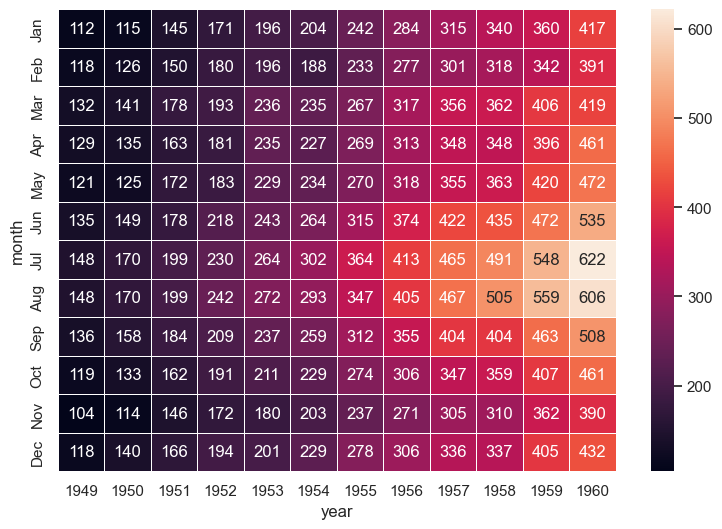

In [48]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax);

## Configurações adicionais

É possível configurar os rótulos dos eixos, tamanhos das figuras, resolução, tamanho das fontes, adicionar símbolo $\LaTeX$...

Consultar a documentação das bibliotecas ``seaborn`` e ``matplotlib``.

# What is next?

1. Exemplo de site com **excelentes** visualizações: https://projects.fivethirtyeight.com/

2. *Creating effective slides: Design, Construction, and Use in Science:* https://www.youtube.com/watch?v=meBXuTIPJQk

3. Ler capítulos 2 e 3 de https://dataminingbook.info/book_html/
